In [6]:
from data.dielectric import DataSet
from fitting.debye import Bare
from pathlib import Path
import numpy as np
import matplotlib.pylab as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["mathtext.fontset"] = "cm"
%matplotlib widget

filenames = []
for dir in Path(r"C:\Users\Teddy\OneDrive - UCB-O365\Rogerslab3\Teddy\Capacitors\Mounts\Mount 05\2024").iterdir():
    if dir.name != "1st pump out":
        for file in dir.glob("*.csv"):
            filenames.append(file)
for file in filenames:
    print(file.name)

2024-05-07__Bare__M05-2-TT501__CAL__T-09-00.csv
2024-05-08__Bare__M05-2-TT501__CAL__T-13-28.csv
2024-05-15__Bare__M05-2-TT501__CAL__T-13-41.csv
2024-05-16__Bare__M05-2-TT501__CAL__T-09-27.csv
2024-05-20__Bare__M05-2-TT501__CAL__T-12-05.csv
2024-05-21__Bare__M05-2-TT501__CAL__T-14-11.csv
2024-05-28__Bare__M05-2-TT501__CAL__T-12-18.csv


[300.0, 700.0, 1400.0, 3000.0, 7000.0, 14000.0, 20000.0]
(23544, 7)
(23544, 7)
(23544, 7)


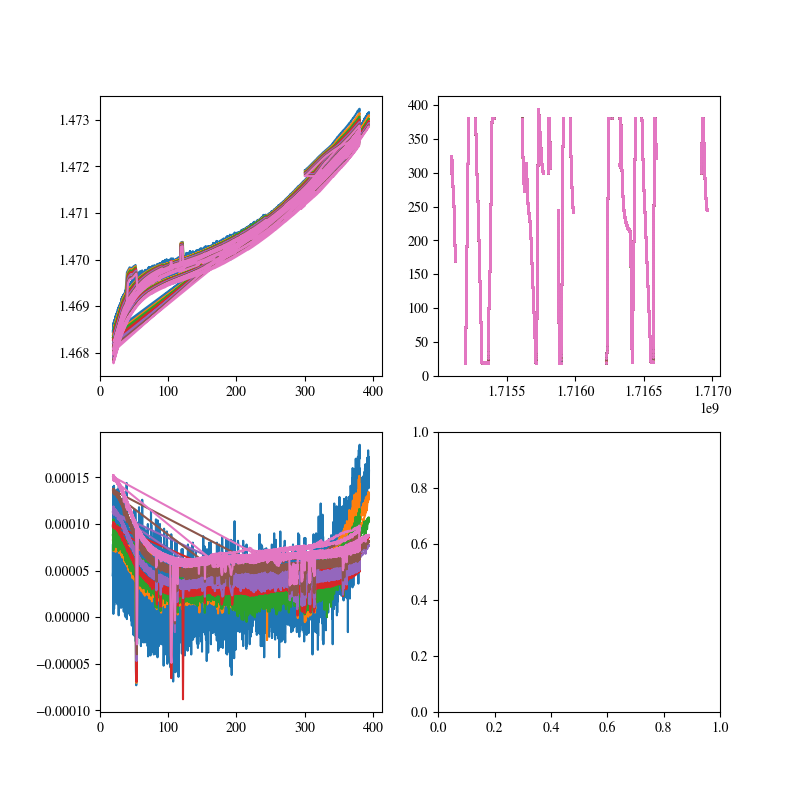

In [2]:
data = DataSet(filenames)
data.time_derivative_filter()
data.remove_bad_data()
print(data.get_frequencies())
time = data.get_times()
temp = data.get_temperatures()
caps = data.get_capacitances()
loss = data.get_losses()
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
for ii in range(7):
    ax[0, 0].plot(temp[:, ii], caps[:, ii])
    ax[1, 0].plot(temp[:, ii], loss[:, ii])
    ax[0, 1].scatter(time[:, ii], temp[:, ii], s=1)

print(temp.shape)
print(caps.shape)
print(loss.shape)

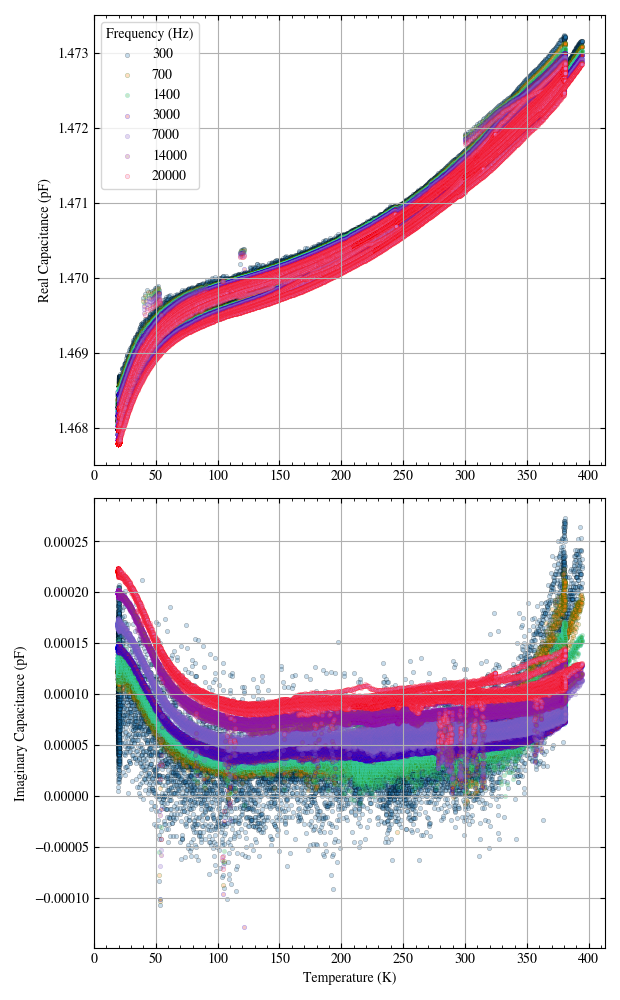

In [3]:
fit = Bare(temp, caps, loss, data.get_frequencies())
fit.show_data()

c:\Users\Teddy\Documents\Git\ttortorici\fitting\fitting\debye.py:69: RuntimeWarning: overflow encountered in multiply
  dielectric_real = amp / (self.temp - tc) * chi / (1.0 + omega_tau * omega_tau)


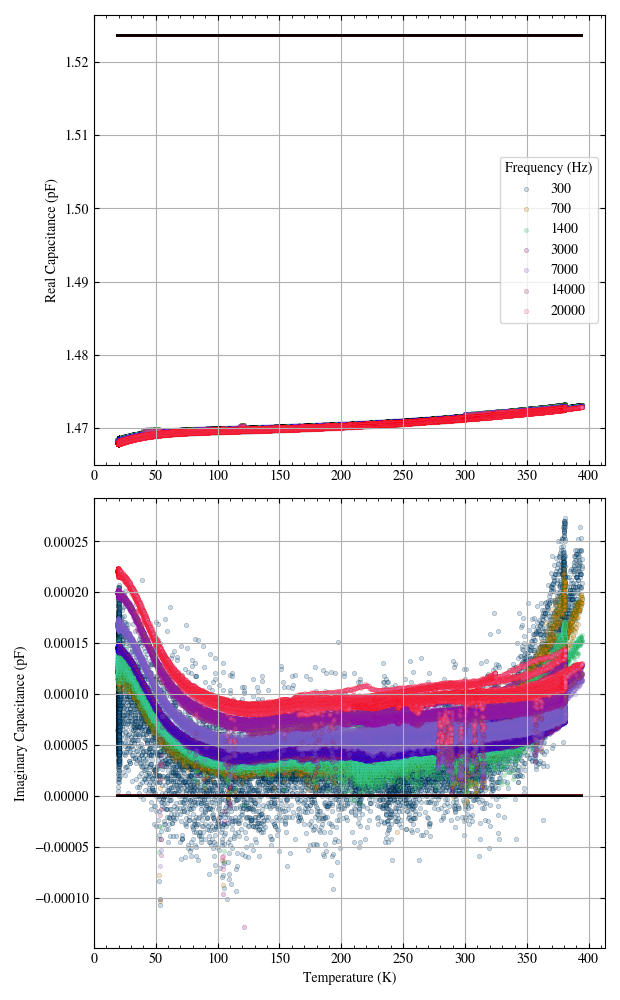

In [13]:
fit.initialize_fit(11)
fit.gap_width = 6.5
fit.real_b_300 = 3.72
fit.show_fit()

In [12]:
from scipy.special import ellipk

unit_width = 20
gap_width = 5
substrate_thickness = 500

modulus_sq_0 = 2.0 * (unit_width - gap_width) ** 3 / ((unit_width + gap_width) ** 2 * (2 * unit_width - gap_width))
modulus_sq_1 = fit.modulus(gap_width, unit_width, substrate_thickness)
print(modulus_sq_0)
print(modulus_sq_1)
root_kp0 = (1 - modulus_sq_0) ** 0.25
root_kp1 = (1 - modulus_sq_1) ** 0.25
ellint_ratio_approx = np.pi / np.log(2 * (1 + root_kp0) / (1 - root_kp0))
ellint_ratio = ellipk(modulus_sq_0) / ellipk(1-modulus_sq_0)
print(ellint_ratio_approx)
print(ellint_ratio)

c = fit.eps0 * 49 * 1e-3 * (2 * ellint_ratio + (3.9 - 1) * ellint_ratio)
print(c)

0.30857142857142855
0.3085712772604057
0.8332543458581747
0.8332544705416374
1.771407758725485
